In [5]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
electronics = pd.read_csv('Electronics_ratings.csv', names=['userID', 'productID', 'Rating', 'Timestamp'])
electronics.head()

,userID,productID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [7]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
electronics.shape

(7824482, 4)

In [9]:
electronics.isnull().sum()

userID       0
productID    0
Rating       0
Timestamp    0
dtype: int64

In [10]:
electronics.describe()['Rating'].T

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Rating', ylabel='count'>

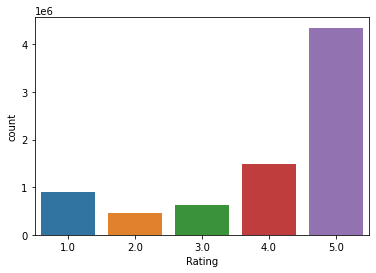

In [12]:
sns.countplot(x = 'Rating', data = electronics)

In [13]:
electronics.drop(['Timestamp'], axis=1, inplace = True)

In [14]:
electronics.head()

,userID,productID,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [15]:
no_of_products_rated_per_user = electronics.groupby(by = 'userID')['Rating'].count().sort_values(ascending = False)
no_of_products_rated_per_user.head()

userID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [16]:
no_of_products_rated_per_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

In [17]:
print("No. of products rated more than 50 per user: {}\n".format(sum(no_of_products_rated_per_user >= 50)))

No. of products rated more than 50 per user: 1540



In [18]:
df=electronics.groupby("productID").filter(lambda x:x['Rating'].count() >=50)

In [19]:
df = df.reset_index()
df.head()

,index,userID,productID,Rating
0,183,A1BKC6B7YHYTVV,0972683275,4.0
1,184,AWVFSIB42LHKJ,0972683275,4.0
2,185,A36MQBNADRH8YY,0972683275,5.0
3,186,A3SRXMPLAEZ6DP,0972683275,4.0
4,187,A20XXTXWF2TCPY,0972683275,5.0


In [20]:
df.drop(['index'], axis=1, inplace = True)

df.head()

# Collabarative Filtering By Model

In [21]:
new_df = df.head(10000)
r_matrix = new_df.pivot_table(values = 'Rating', index = 'userID', columns = 'productID', fill_value = 0)
r_matrix.head()

productID,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userID,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df1 = r_matrix.T
df1.head()

userID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components = 10)

In [24]:
decomposed_matrix = SVD.fit_transform(df1)
decomposed_matrix.shape

(76, 10)

In [25]:
corr_matrix = np.corrcoef(decomposed_matrix)

In [26]:
corr_matrix.shape

(76, 76)

In [27]:
df1.index[70]

'B00000JMUG'

In [28]:
x = 'B00000JMUG'

product_names = list(df1.index)
product_Id = product_names.index(x)
product_Id

70

In [29]:
correlation_product_ID = corr_matrix[product_Id]
correlation_product_ID.shape

(76,)

In [30]:
Recommend = list(df1.index[correlation_product_ID >= 0.65])

Recommend.remove(x)
Recommend[0:20]

['1400501466',
 '1400501520',
 '1400501776',
 '1400599997',
 '1400698987',
 '9575871979',
 '9888002198',
 'B00000J1EP',
 'B00000J1F3',
 'B00000J1V3',
 'B00000J3UJ',
 'B00000J4EY',
 'B00000J6WY',
 'B00000JCTO',
 'B00000K135']

# Collabaratiive Filtering item-item

In [31]:
!pip install surprise 

In [32]:
from surprise import KNNWithMeans, Dataset, accuracy, Reader
from surprise.model_selection import train_test_split

In [33]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df, reader)

In [35]:
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 10)

In [37]:
model = KNNWithMeans(k = 5, sim_options = {'name': 'pearson_baseline', 'user_based': False})
model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [38]:
pred_test = model.test(testset)

In [39]:
pred_test

[Prediction(uid='ATACIF4RJJ5G0', iid='B0015ADLOQ', r_ui=3.0, est=3.150943396226415, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2WPI1AF4J2623', iid='B001UQ6F5M', r_ui=4.0, est=3.7025495750708215, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2BFLIOUYIRF6I', iid='B004CGHDEO', r_ui=1.0, est=4.062982939678331, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AMGULZEULBJFM', iid='B006GWO5WK', r_ui=1.0, est=4.062982939678331, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2GGMWQ16BDO84', iid='B00721TUNS', r_ui=4.0, est=4.42089552238806, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A14BO9H7AKRRST', iid='B0041RSPRS', r_ui=5.0, est=4.465573770491804, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1HBNR4G6X2VLP', iid='B0015HYPOO', r_ui=5.0, est=4.411904761904762, details={'actual_k': 0, 'was_impossible': False})

In [41]:
print("Item-based Model : Test Set")
accuracy.rmse(pred_test, verbose=True)

Item-based Model : Test Set
RMSE: 1.3345


1.3345287465693558